In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
df= pd.read_excel(r'C:\Users\Prakhar\Processed_Flipdata.xlsx')

In [3]:
df.head(5)

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


# Exploratory Data Analysis

In [4]:
# Deatils of Mobile Data

print('Columns of Mobile Data')
print(df.columns)

print('Head of Mobile Data')
print(df.head())

print('Tail of Mobile Data')
print(df.tail())

print('Shape of Mobile Data')
print(df.shape)

print('Dimension of Mobile Data')
print(df.ndim)

Columns of Mobile Data
Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Price'],
      dtype='object')
Head of Mobile Data
   Unnamed: 0            Model        Colour  Memory  RAM  Battery_  \
0           0  Infinix SMART 7   Night Black      64    4      6000   
1           1  Infinix SMART 7    Azure Blue      64    4      6000   
2           2     MOTOROLA G32  Mineral Gray     128    8      5000   
3           3         POCO C50    Royal Blue      32    2      5000   
4           4  Infinix HOT 30i      Marigold     128    8      5000   

  Rear Camera Front Camera  AI Lens  Mobile Height  \
0        13MP          5MP        1          16.76   
1        13MP          5MP        1          16.76   
2        50MP         16MP        0          16.64   
3         8MP          5MP        0          16.56   
4        50MP          5MP        1          16.76   

                 

In [5]:
df.describe()

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height,Price
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,289.711645,110.550832,5.397412,4871.587800,0.062847,16.431201,16228.375231
std,182.359185,60.600694,1.984923,780.148862,0.242911,2.523553,10793.588322
min,0.000000,16.000000,2.000000,800.000000,0.000000,4.500000,920.000000
25%,135.000000,64.000000,4.000000,5000.000000,0.000000,16.510000,9290.000000
50%,273.000000,128.000000,6.000000,5000.000000,0.000000,16.710000,13499.000000
75%,434.000000,128.000000,8.000000,5000.000000,0.000000,16.940000,19280.000000
max,642.000000,256.000000,8.000000,7000.000000,1.000000,41.940000,80999.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Price          541 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 50.8+ KB


# Convert Price Object Into Integer

In [7]:
df['Price']= df['Price'].astype(str).astype('Int64')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Price          541 non-null    Int64  
dtypes: Int64(1), float64(1), int64(5), object(5)
memory usage: 51.4+ KB


# Data Preprocessing

# Missing value

In [9]:
df.isnull().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Price            0
dtype: int64

# Describe & Correlation Of Mobile Data

In [10]:
# Describe and Correlation of Mobile Data

print('\Describe of Mobile Data')
print(df.describe())

print('\Correlation of Mobile Data')
print(df.corr())


\Describe of Mobile Data
       Unnamed: 0      Memory         RAM     Battery_     AI Lens  \
count  541.000000  541.000000  541.000000   541.000000  541.000000   
mean   289.711645  110.550832    5.397412  4871.587800    0.062847   
std    182.359185   60.600694    1.984923   780.148862    0.242911   
min      0.000000   16.000000    2.000000   800.000000    0.000000   
25%    135.000000   64.000000    4.000000  5000.000000    0.000000   
50%    273.000000  128.000000    6.000000  5000.000000    0.000000   
75%    434.000000  128.000000    8.000000  5000.000000    0.000000   
max    642.000000  256.000000    8.000000  7000.000000    1.000000   

       Mobile Height         Price  
count     541.000000         541.0  
mean       16.431201  16228.375231  
std         2.523553  10793.588322  
min         4.500000         920.0  
25%        16.510000        9290.0  
50%        16.710000       13499.0  
75%        16.940000       19280.0  
max        41.940000       80999.0  
\Correlatio

C:\Users\Prakhar\AppData\Local\Temp\ipykernel_36848\737026971.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


In [11]:
df.head(2)

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299


# Feature Engineering

In [12]:
df['Colour'].unique

<bound method Series.unique of 0         Night Black
1          Azure Blue
2        Mineral Gray
3          Royal Blue
4            Marigold
            ...      
536             Cream
537              Cyan
538    Turquoise Cyan
539      Awesome Lime
540          Sky Blue
Name: Colour, Length: 541, dtype: object>

In [13]:
df['Model'].unique

<bound method Series.unique of 0            Infinix SMART 7
1            Infinix SMART 7
2               MOTOROLA G32
3                   POCO C50
4            Infinix HOT 30i
               ...          
536    SAMSUNG Galaxy S23 5G
537                 LAVA Z21
538           Tecno Spark 8T
539    SAMSUNG Galaxy A54 5G
540                 OPPO A77
Name: Model, Length: 541, dtype: object>

In [14]:
df['Processor_'].unique

<bound method Series.unique of 0       Unisoc Spreadtrum SC9863A1
1       Unisoc Spreadtrum SC9863A1
2          Qualcomm Snapdragon 680
3               Mediatek Helio A22
4                              G37
                  ...             
536    Qualcomm Snapdragon 8 Gen 2
537                      Octa Core
538             MediaTek Helio G35
539        Exynos 1380, Octa Core 
540             Mediatek Helio G35
Name: Processor_, Length: 541, dtype: object>

In [15]:
from sklearn.preprocessing import OrdinalEncoder

# One hot encoding 

One hot encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model.

# Ordinal Code on Model, Colour and Processor

In [16]:
columns_encoding= ['Model', 'Colour','Processor_']

In [17]:
encoder= OrdinalEncoder()

In [18]:
df[columns_encoding] = encoder.fit_transform(df[columns_encoding])

In [19]:
df[columns_encoding]

,Model,Colour,Processor_
0,23.0,159.0,113.0
1,23.0,20.0,113.0
2,37.0,149.0,75.0
3,69.0,201.0,56.0
4,12.0,130.0,14.0
...,...,...,...
536,118.0,49.0,89.0
537,32.0,52.0,68.0
538,123.0,259.0,35.0
539,110.0,17.0,11.0


# Label Encoding

Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data.

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder =LabelEncoder()

In [21]:
df['Model']= label_encoder.fit_transform(df['Model'])

In [22]:
df['Model']

0       23
1       23
2       37
3       69
4       12
      ... 
536    118
537     32
538    123
539    110
540     59
Name: Model, Length: 541, dtype: int64

In [23]:
df['Colour']= label_encoder.fit_transform(df['Colour'])

In [24]:
df['Colour']

0      159
1       20
2      149
3      201
4      130
      ... 
536     49
537     52
538    259
539     17
540    215
Name: Colour, Length: 541, dtype: int64

In [25]:
df['Processor_']= label_encoder.fit_transform(df['Processor_'])

In [26]:
df['Processor_']

0      113
1      113
2       75
3       56
4       14
      ... 
536     89
537     68
538     35
539     11
540     57
Name: Processor_, Length: 541, dtype: int64

In [27]:
df.head(2)

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
0,0,23,159,64,4,6000,13MP,5MP,1,16.76,113,7299
1,1,23,20,64,4,6000,13MP,5MP,1,16.76,113,7299


# Converting Object into Integer

In [28]:
df['Rear Camera']= df['Rear Camera'].str.replace('MP','')
df['Front Camera']= df['Front Camera'].str.replace('MP','')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    int64  
 2   Colour         541 non-null    int64  
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    int64  
 11  Price          541 non-null    Int64  
dtypes: Int64(1), float64(1), int64(8), object(2)
memory usage: 51.4+ KB


In [30]:
df['Rear Camera']= df['Rear Camera'].astype(str).astype('Int64')
df['Front Camera']= df['Front Camera'].astype(str).astype('Int64')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    int64  
 2   Colour         541 non-null    int64  
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    Int64  
 7   Front Camera   541 non-null    Int64  
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    int64  
 11  Price          541 non-null    Int64  
dtypes: Int64(3), float64(1), int64(8)
memory usage: 52.4 KB


# Feature Extraction

In [32]:
print('\Correlation of Mobile Data')
print(df.corr())

\Correlation of Mobile Data
               Unnamed: 0     Model    Colour    Memory       RAM  Battery_  \
Unnamed: 0       1.000000  0.053021  0.023796  0.120579  0.084103 -0.057136   
Model            0.053021  1.000000  0.106594  0.036055  0.005924 -0.090875   
Colour           0.023796  0.106594  1.000000  0.042121  0.064503  0.027350   
Memory           0.120579  0.036055  0.042121  1.000000  0.625284 -0.053210   
RAM              0.084103  0.005924  0.064503  0.625284  1.000000 -0.104923   
Battery_        -0.057136 -0.090875  0.027350 -0.053210 -0.104923  1.000000   
Rear Camera      0.036324  0.000340  0.053969  0.530615  0.439558  0.198260   
Front Camera     0.233370  0.048434  0.035167  0.496865  0.493861  0.032970   
AI Lens         -0.160373 -0.396336 -0.030308 -0.094442 -0.082622  0.150156   
Mobile Height    0.015372 -0.135728  0.016014  0.063163  0.092951  0.695641   
Processor_       0.064298  0.036362 -0.068677 -0.149665 -0.108733 -0.136305   
Price            0.33394

In [33]:
df.drop('Unnamed: 0', axis =1, inplace = True)

In [34]:
df

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
0,23,159,64,4,6000,13,5,1,16.76,113,7299
1,23,20,64,4,6000,13,5,1,16.76,113,7299
2,37,149,128,8,5000,50,16,0,16.64,75,11999
3,69,201,32,2,5000,8,5,0,16.56,56,5649
4,12,130,128,8,5000,50,5,1,16.76,14,8999
...,...,...,...,...,...,...,...,...,...,...,...
536,118,49,256,8,3900,50,12,0,15.49,89,79999
537,32,52,32,2,3100,5,2,0,12.70,68,5998
538,123,259,64,4,5000,50,8,0,16.76,35,9990
539,110,17,128,8,5000,50,32,0,16.26,11,38999


In [35]:
df.corr()['Price']

Model           -0.075163
Colour           0.038895
Memory           0.566660
RAM              0.532024
Battery_        -0.034297
Rear Camera      0.410367
Front Camera     0.532321
AI Lens         -0.153691
Mobile Height    0.176009
Processor_      -0.050244
Price            1.000000
Name: Price, dtype: float64

# Scatter Plot Using RAM & Price

<Axes: xlabel='RAM', ylabel='Price'>

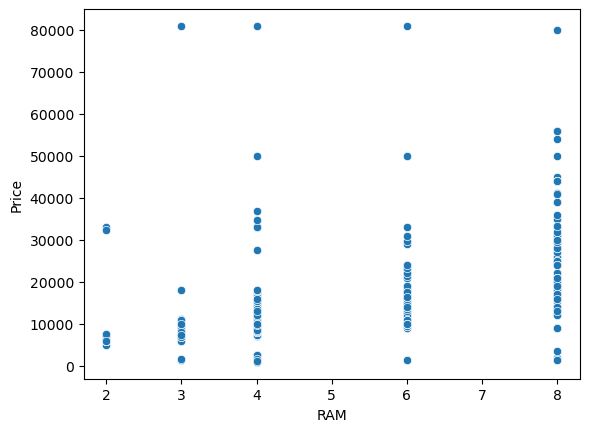

In [36]:
sns.scatterplot(data= df, x= 'RAM', y= 'Price' )

# Scatter Plot Using Mobile and Rear Camera

<Axes: xlabel='Rear Camera', ylabel='Price'>

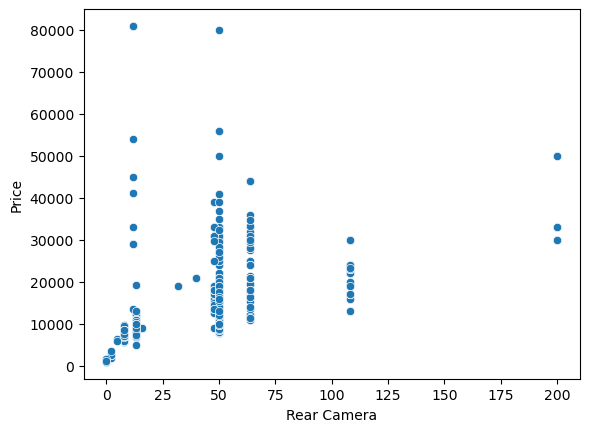

In [37]:
sns.scatterplot(data=df, x= 'Rear Camera', y= 'Price')

# Scatter Plot Using Price and Front Camera

<Axes: xlabel='Front Camera', ylabel='Price'>

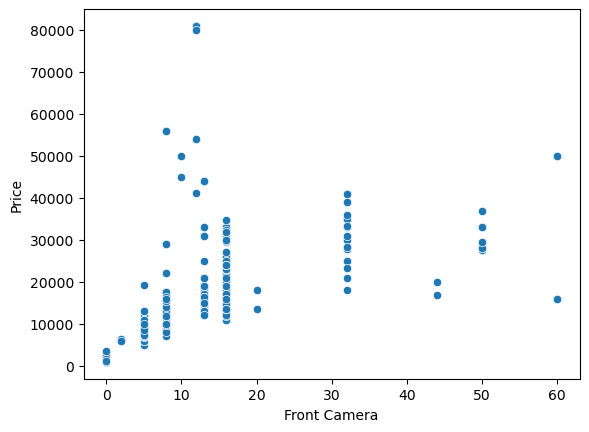

In [38]:
sns.scatterplot(data= df, x= 'Front Camera', y = 'Price' )

# Scatter Plot Using Memory and Price

<Axes: xlabel='Memory', ylabel='Price'>

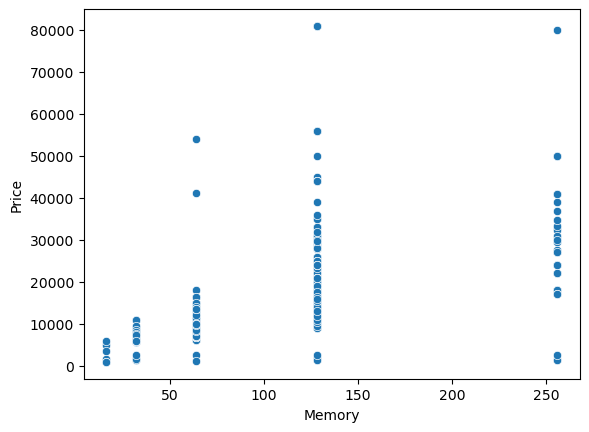

In [39]:
sns.scatterplot(data= df, x= 'Memory', y= 'Price')

# Outliers Front Camera

In [40]:
df[(df['Front Camera']>50)|(df['Price']<70)]

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
293,28,95,128,8,4500,108,60,0,17.02,55,15999
294,28,54,128,8,4500,108,60,0,17.02,55,15999
400,35,107,256,4,4610,200,60,0,16.94,90,49999
489,35,232,256,6,4610,200,60,0,16.94,90,49999


# Quantile Method

In [41]:
Q1= df['Price'].quantile(0.25)
Q3= df['Price'].quantile(0.75)
IQR= Q3-Q1
Outliers= df[(df['Price']<(Q1-1.5*IQR))|(df['Price']>(Q3+1.5*IQR))]

In [42]:
Outliers

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
222,117,181,128,8,4500,50,10,0,16.76,88,49999
286,119,181,128,8,3300,12,10,0,17.02,97,44999
305,34,47,128,8,4400,50,32,0,16.64,96,34999
308,5,209,128,8,4300,64,13,0,15.49,108,43999
309,5,37,128,8,4300,64,13,0,15.49,108,43999
327,5,217,128,8,4300,64,13,0,15.49,108,43999
396,176,129,256,4,4600,50,50,0,17.22,48,36999
400,35,107,256,4,4610,200,60,0,16.94,90,49999
416,4,217,128,8,4270,50,8,0,16.00,16,55999
417,4,165,128,8,4270,50,8,0,16.00,16,55999


# Removing Outlier

In [43]:
df.drop(Outliers.index)

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
0,23,159,64,4,6000,13,5,1,16.76,113,7299
1,23,20,64,4,6000,13,5,1,16.76,113,7299
2,37,149,128,8,5000,50,16,0,16.64,75,11999
3,69,201,32,2,5000,8,5,0,16.56,56,5649
4,12,130,128,8,5000,50,5,1,16.76,14,8999
...,...,...,...,...,...,...,...,...,...,...,...
534,55,96,64,4,5000,50,8,0,16.55,68,9790
535,104,119,64,3,5000,13,5,0,16.51,65,9999
537,32,52,32,2,3100,5,2,0,12.70,68,5998
538,123,259,64,4,5000,50,8,0,16.76,35,9990


# Dropping Unnecessary Column

In [44]:
df.drop(['Rear Camera','Front Camera'], axis=1)

,Model,Colour,Memory,RAM,Battery_,AI Lens,Mobile Height,Processor_,Price
0,23,159,64,4,6000,1,16.76,113,7299
1,23,20,64,4,6000,1,16.76,113,7299
2,37,149,128,8,5000,0,16.64,75,11999
3,69,201,32,2,5000,0,16.56,56,5649
4,12,130,128,8,5000,1,16.76,14,8999
...,...,...,...,...,...,...,...,...,...
536,118,49,256,8,3900,0,15.49,89,79999
537,32,52,32,2,3100,0,12.70,68,5998
538,123,259,64,4,5000,0,16.76,35,9990
539,110,17,128,8,5000,0,16.26,11,38999


In [45]:
df.head(5)

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
0,23,159,64,4,6000,13,5,1,16.76,113,7299
1,23,20,64,4,6000,13,5,1,16.76,113,7299
2,37,149,128,8,5000,50,16,0,16.64,75,11999
3,69,201,32,2,5000,8,5,0,16.56,56,5649
4,12,130,128,8,5000,50,5,1,16.76,14,8999


In [46]:
df.to_csv('Mobile Data.csv')

# Feature Extraction Using PCA

In [47]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [48]:
iris= load_iris()
X,Y= iris.data, iris.target

In [49]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size= 0.2, random_state=40)

# PCA

In [50]:
pca= PCA(n_components=2)
X_train_pca= pca.fit_transform(X_train)
X_test_pca= pca.transform(X_test)

In [51]:
clf= RandomForestClassifier()
clf.fit(X_train_pca,Y_train)

RandomForestClassifier()

In [52]:
accuracy= clf.score(X_test_pca, Y_test)

In [53]:
print(f"Accuracy with PCA: {accuracy}")

Accuracy with PCA: 1.0


# Visualization(Correlation Analysis)

In [54]:
df.corr()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
Model,1.000000,0.106594,0.036055,0.005924,-0.090875,0.000340,0.048434,-0.396336,-0.135728,0.036362,-0.075163
Colour,0.106594,1.000000,0.042121,0.064503,0.027350,0.053969,0.035167,-0.030308,0.016014,-0.068677,0.038895
Memory,0.036055,0.042121,1.000000,0.625284,-0.053210,0.530615,0.496865,-0.094442,0.063163,-0.149665,0.566660
RAM,0.005924,0.064503,0.625284,1.000000,-0.104923,0.439558,0.493861,-0.082622,0.092951,-0.108733,0.532024
Battery_,-0.090875,0.027350,-0.053210,-0.104923,1.000000,0.198260,0.032970,0.150156,0.695641,-0.136305,-0.034297
Rear Camera,0.000340,0.053969,0.530615,0.439558,0.198260,1.000000,0.505378,-0.043597,0.239883,-0.099895,0.410367
Front Camera,0.048434,0.035167,0.496865,0.493861,0.032970,0.505378,1.000000,-0.111779,0.208012,-0.040641,0.532321
AI Lens,-0.396336,-0.030308,-0.094442,-0.082622,0.150156,-0.043597,-0.111779,1.000000,0.052018,-0.112740,-0.153691
Mobile Height,-0.135728,0.016014,0.063163,0.092951,0.695641,0.239883,0.208012,0.052018,1.000000,-0.036817,0.176009
Processor_,0.036362,-0.068677,-0.149665,-0.108733,-0.136305,-0.099895,-0.040641,-0.112740,-0.036817,1.000000,-0.050244


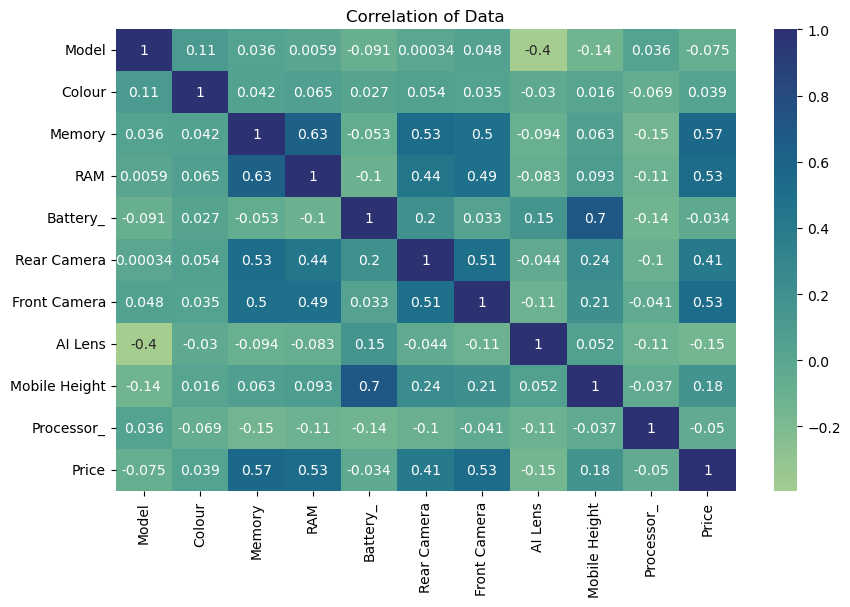

In [55]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True, cmap= 'crest')
plt.title('Correlation of Data')
plt.show()

In [56]:
#Analysis:
## Memory, Ram, Front Camera and Rear Camera have positive correlation

# CountPlot RAM

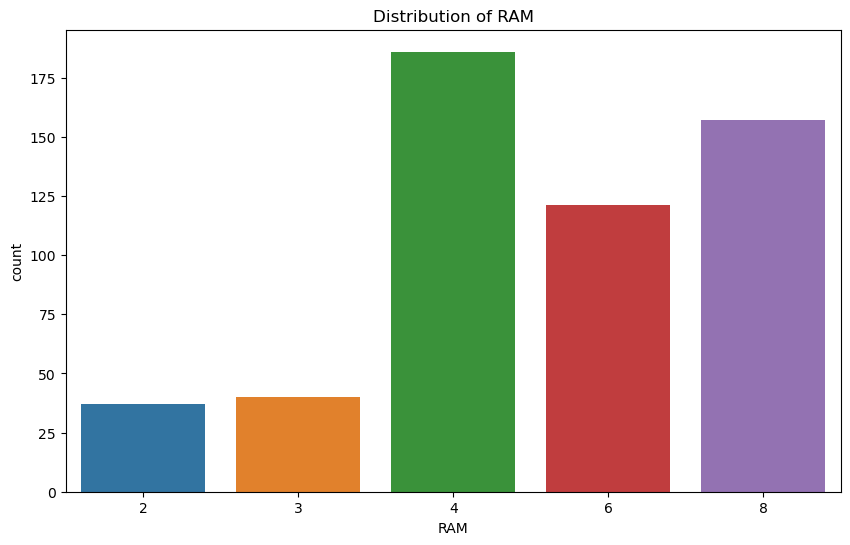

In [57]:
plt.figure(figsize= (10,6))
sns.countplot(data= df, x= 'RAM')
plt.title('Distribution of RAM')
plt.show()

In [58]:
#Analysis:
##This Indicates that 4G & 8G RAM have higher Count

# Boxplot Of Memory

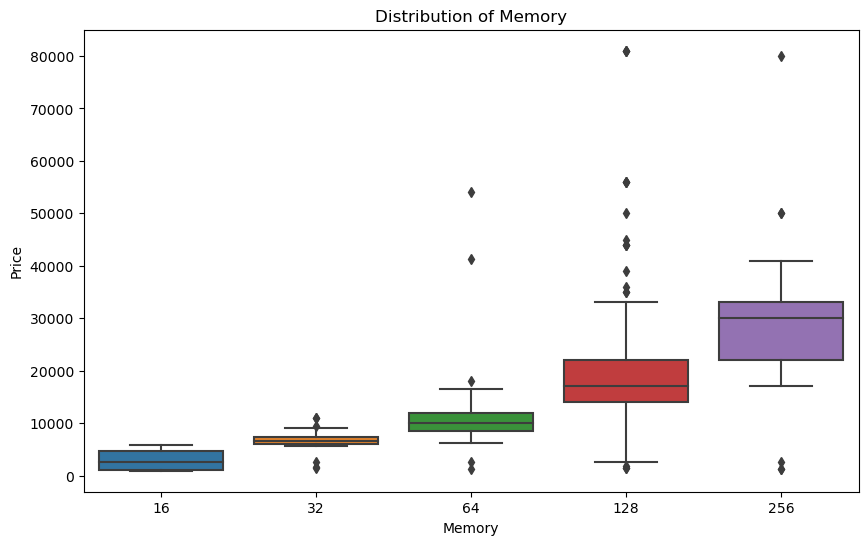

In [59]:
plt.figure(figsize= (10,6))
sns.boxplot(data= df, x= 'Memory', y= 'Price')
plt.title('Distribution of Memory')
plt.show()

In [60]:
#Analysis:
# This shows that 128 GB & 256GB memory have higher price of mobile

# Feature Selection

In [61]:
X= df.drop('Price', axis=1)

In [62]:
X

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_
0,23,159,64,4,6000,13,5,1,16.76,113
1,23,20,64,4,6000,13,5,1,16.76,113
2,37,149,128,8,5000,50,16,0,16.64,75
3,69,201,32,2,5000,8,5,0,16.56,56
4,12,130,128,8,5000,50,5,1,16.76,14
...,...,...,...,...,...,...,...,...,...,...
536,118,49,256,8,3900,50,12,0,15.49,89
537,32,52,32,2,3100,5,2,0,12.70,68
538,123,259,64,4,5000,50,8,0,16.76,35
539,110,17,128,8,5000,50,32,0,16.26,11


In [104]:
Y= df.Price

In [105]:
Y

0       7299
1       7299
2      11999
3       5649
4       8999
       ...  
536    79999
537     5998
538     9990
539    38999
540    15999
Name: Price, Length: 541, dtype: Int64

In [65]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size= 0.2, random_state=80)

In [66]:
X_train

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_
94,50,124,128,8,5000,50,16,0,16.51,53
380,109,16,256,8,5000,48,13,0,16.76,4
454,173,227,128,8,4200,64,16,0,16.36,52
168,134,39,128,8,5000,50,16,0,16.26,64
402,106,59,128,8,5000,50,13,0,16.76,101
...,...,...,...,...,...,...,...,...,...,...
3,69,201,32,2,5000,8,5,0,16.56,56
522,8,82,256,4,5000,64,16,0,17.22,9
211,169,102,128,8,5000,50,16,0,16.36,75
188,76,40,128,8,5000,64,16,0,16.33,62


In [67]:
Y_train

,Price
94,16999
380,32999
454,29990
168,15499
402,20999
...,...
3,5649
522,34688
211,17999
188,13999


In [68]:
X_test

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_
369,91,182,128,6,5080,64,16,0,16.76,8
117,36,67,256,8,4400,50,32,0,16.64,6
282,161,150,32,2,5000,8,5,0,16.51,100
371,38,136,64,4,5000,50,16,0,16.43,75
89,113,22,128,6,6000,50,13,0,16.76,10
...,...,...,...,...,...,...,...,...,...,...
341,179,241,128,4,5000,13,5,0,16.54,65
261,141,145,256,8,4500,50,16,0,16.26,52
16,12,130,64,4,5000,50,5,1,16.76,14
151,10,195,64,4,5000,50,8,1,16.76,7


In [69]:
Y_test

,Price
369,21499
117,29999
282,7370
371,11980
89,14490
...,...
341,12999
261,21999
16,7999
151,11499


# Linear Regression

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
lr= LinearRegression()

In [117]:
Y

0       7299
1       7299
2      11999
3       5649
4       8999
       ...  
536    79999
537     5998
538     9990
539    38999
540    15999
Name: Price, Length: 541, dtype: Int64

In [118]:
X_train,X_test,Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=2)

In [119]:
lr.fit(X_train,Y_train)

LinearRegression()

In [74]:
lr.score(X_train,Y_train)

0.46433330038854126

# Predicting the Model

In [122]:
Y_predict= lr.predict(X_test)

In [123]:
Y_predict

array([17580.52006529, 11146.8449431 , 24364.789032  ,  6986.86453961,
       16279.14400345, 12312.51579552,  9069.7471748 , 20768.25955777,
       17311.18053379, 27900.76234209, 10425.09060649, 19661.84043336,
       11581.71334494, 14929.71458741, 13455.92152819, 20848.18036926,
       22082.79333535, 19521.55371093, 16495.30518173, 27304.97410929,
       18240.44756489, 22324.52666065, 18238.78908409, 28123.65636398,
       12712.5081582 , 16872.43391108, 16606.00301625, 25337.33854939,
        7922.87041587, 11360.58735454, 17937.06074819, 22082.79333535,
       23575.06153241, 17985.55407427, 28625.69148911, 21149.14301488,
       16861.38707892, 17844.80721855, 18560.74738029, 18248.73427455,
       15004.39611453,  5223.26730379, 12584.9364748 , 12737.15286093,
        7156.97315121, 24350.62723587, 20324.82408067, 19950.0628289 ,
        4924.41325184, 24624.16347064, 20153.85494888, 19868.7332397 ,
       18190.36649961, 19402.43690311,  7497.78695483, 10762.03095766,
      

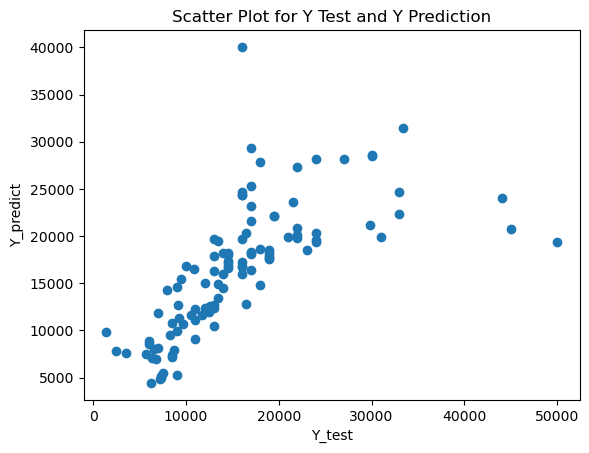

In [77]:
plt.scatter(Y_test,Y_predict)
plt.xlabel('Y_test')
plt.ylabel('Y_predict')
plt.title('Scatter Plot for Y Test and Y Prediction')
plt.show()

# Model Evaluation

In [124]:
MAE= metrics.mean_absolute_error(Y_test,Y_predict)
MSE= metrics.mean_squared_error(Y_test,Y_predict, squared= False)
RMSE= np.sqrt(MSE)

In [125]:
print(MSE)
print(MAE)
print(RMSE)

6299.0052259415925
3931.8268355823584
79.36627259700175


In [126]:
lr.score(X_test, Y_test)

0.45023533882649924

# Standard Scaler

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
std= StandardScaler()

In [83]:
X_std= std.fit_transform(X)

In [84]:
X_std

array([[-1.40347425,  0.31449812, -0.76886767, ...,  3.86157542,
         0.1304125 ,  1.58733302],
       [-1.40347425, -1.44818683, -0.76886767, ...,  3.86157542,
         0.1304125 ,  1.58733302],
       [-1.13714714,  0.18768625,  0.28820325, ..., -0.25896167,
         0.08281648,  0.41544506],
       ...,
       [ 0.49886225,  1.58261678, -0.76886767, ..., -0.25896167,
         0.1304125 , -0.81812122],
       [ 0.25155851, -1.48623039,  0.28820325, ..., -0.25896167,
        -0.06790424, -1.55826099],
       [-0.71863311,  1.02464457,  0.28820325, ..., -0.25896167,
         0.09074915, -0.13965977]])

In [109]:
std.fit(X_train)

StandardScaler()

In [110]:
std.fit_transform(X_train, Y_train)

array([[-1.2862943 ,  1.38729684,  0.31086323, ..., -0.24253563,
         0.34063785, -0.31349772],
       [ 0.78455963,  0.7103436 ,  0.31086323, ..., -0.24253563,
        -0.01813229, -0.64932756],
       [-0.21251819, -1.3205161 ,  0.31086323, ..., -0.24253563,
         0.10519495, -1.35151723],
       ...,
       [-0.03994703, -0.46474503, -0.76924066, ..., -0.24253563,
         0.00802804,  1.21300156],
       [-1.34381802,  0.46766225, -1.3092926 , ..., -0.24253563,
         0.16872716, -0.19137778],
       [-1.32464345, -0.37533611, -0.76924066, ...,  4.12310563,
         0.16872716,  1.36565149]])

In [111]:
std.mean_

array([9.60833333e+01, 1.35385802e+02, 1.09580247e+02, 5.35493827e+00,
       4.85401543e+03, 4.59567901e+01, 1.14197531e+01, 5.55555556e-02,
       1.63085185e+01, 6.22685185e+01])

In [114]:
X_std.mean()

-9.9817463803637e-17

# Feature Importance

In [85]:
X.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera',
       'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_'],
      dtype='object')

In [86]:
coeff_analysis= lr.coef_, X.columns

In [87]:
coeff_analysis

(array([[-3.48190866e+01,  3.99037598e+00,  5.00097901e+01,
          9.65836246e+02, -1.26703728e+00,  3.80862007e+00,
          3.50247801e+02, -6.08609002e+03,  4.81462701e+02,
         -6.27219785e+00]]),
 Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera',
        'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_'],
       dtype='object'))

# Decision Tree

In [185]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [186]:
dtm= DecisionTreeClassifier()

In [187]:
X_train,X_test,Y_train, Y_test= train_test_split(X,Y, test_size=0.4, random_state=4)

In [188]:
dtm.fit(X_train,Y_train)

DecisionTreeClassifier()

In [138]:
Y_test

103    18999
440    27999
347     8649
89     14490
163    16999
       ...  
172     5999
386    28298
197    14999
515    40999
83     11999
Name: Price, Length: 217, dtype: Int64

In [132]:
X_test

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_
103,135,58,128,6,5000,108,16,0,17.07,79
440,174,70,128,8,4500,64,50,0,16.36,51
347,125,10,64,4,5000,50,8,0,16.76,35
89,113,22,128,6,6000,50,13,0,16.76,10
163,114,43,128,6,5000,50,8,0,16.76,83
...,...,...,...,...,...,...,...,...,...,...
172,26,80,32,2,5000,8,5,0,16.76,56
386,67,110,128,8,4500,50,32,0,17.02,71
197,143,221,64,4,5000,50,8,0,16.76,50
515,110,19,256,8,5000,50,32,0,16.26,11


In [145]:
base_pred= dtm.predict(X_test)

In [146]:
base_pred

array([18999., 27999.,  8449., 14490., 16999., 80999.,  6799., 18999.,
       29999.,  9999.,  8999., 25999., 18999.,  9999.,  8749., 29990.,
       13499., 13999., 16999., 16499., 29990., 16999., 16999., 15999.,
        8499.,  6499., 11349.,  6799., 27999., 12499.,  7999., 24999.,
       15999.,  8999., 27999.,  8499., 27999.,  4999., 17999., 13999.,
       13999.,  7299., 13999., 55999., 14499.,  7999.,  6999., 19999.,
       15999.,  9999., 10999., 12990.,  9499., 13499., 29990.,  9499.,
       14490., 11499., 16499., 12999.,  9499., 11999., 16999., 20999.,
       29999.,  8999., 15999., 23999.,  6299.,  9999., 32999.,  9699.,
        8999.,  6199.,  9999., 17999., 17999., 13999.,  9999.,  1422.,
       34688.,  9499., 18999., 11999., 11999.,  7299., 17499., 12499.,
       21499., 13999., 17999.,  6499.,  6799., 40999., 16999.,  8999.,
       17499.,  7245., 17999.,  2499., 17499.,  8999., 29999., 12499.,
        6799., 10499., 13999., 15999., 10499., 17999.,  2499., 16999.,
      

In [96]:
from sklearn.tree import plot_tree

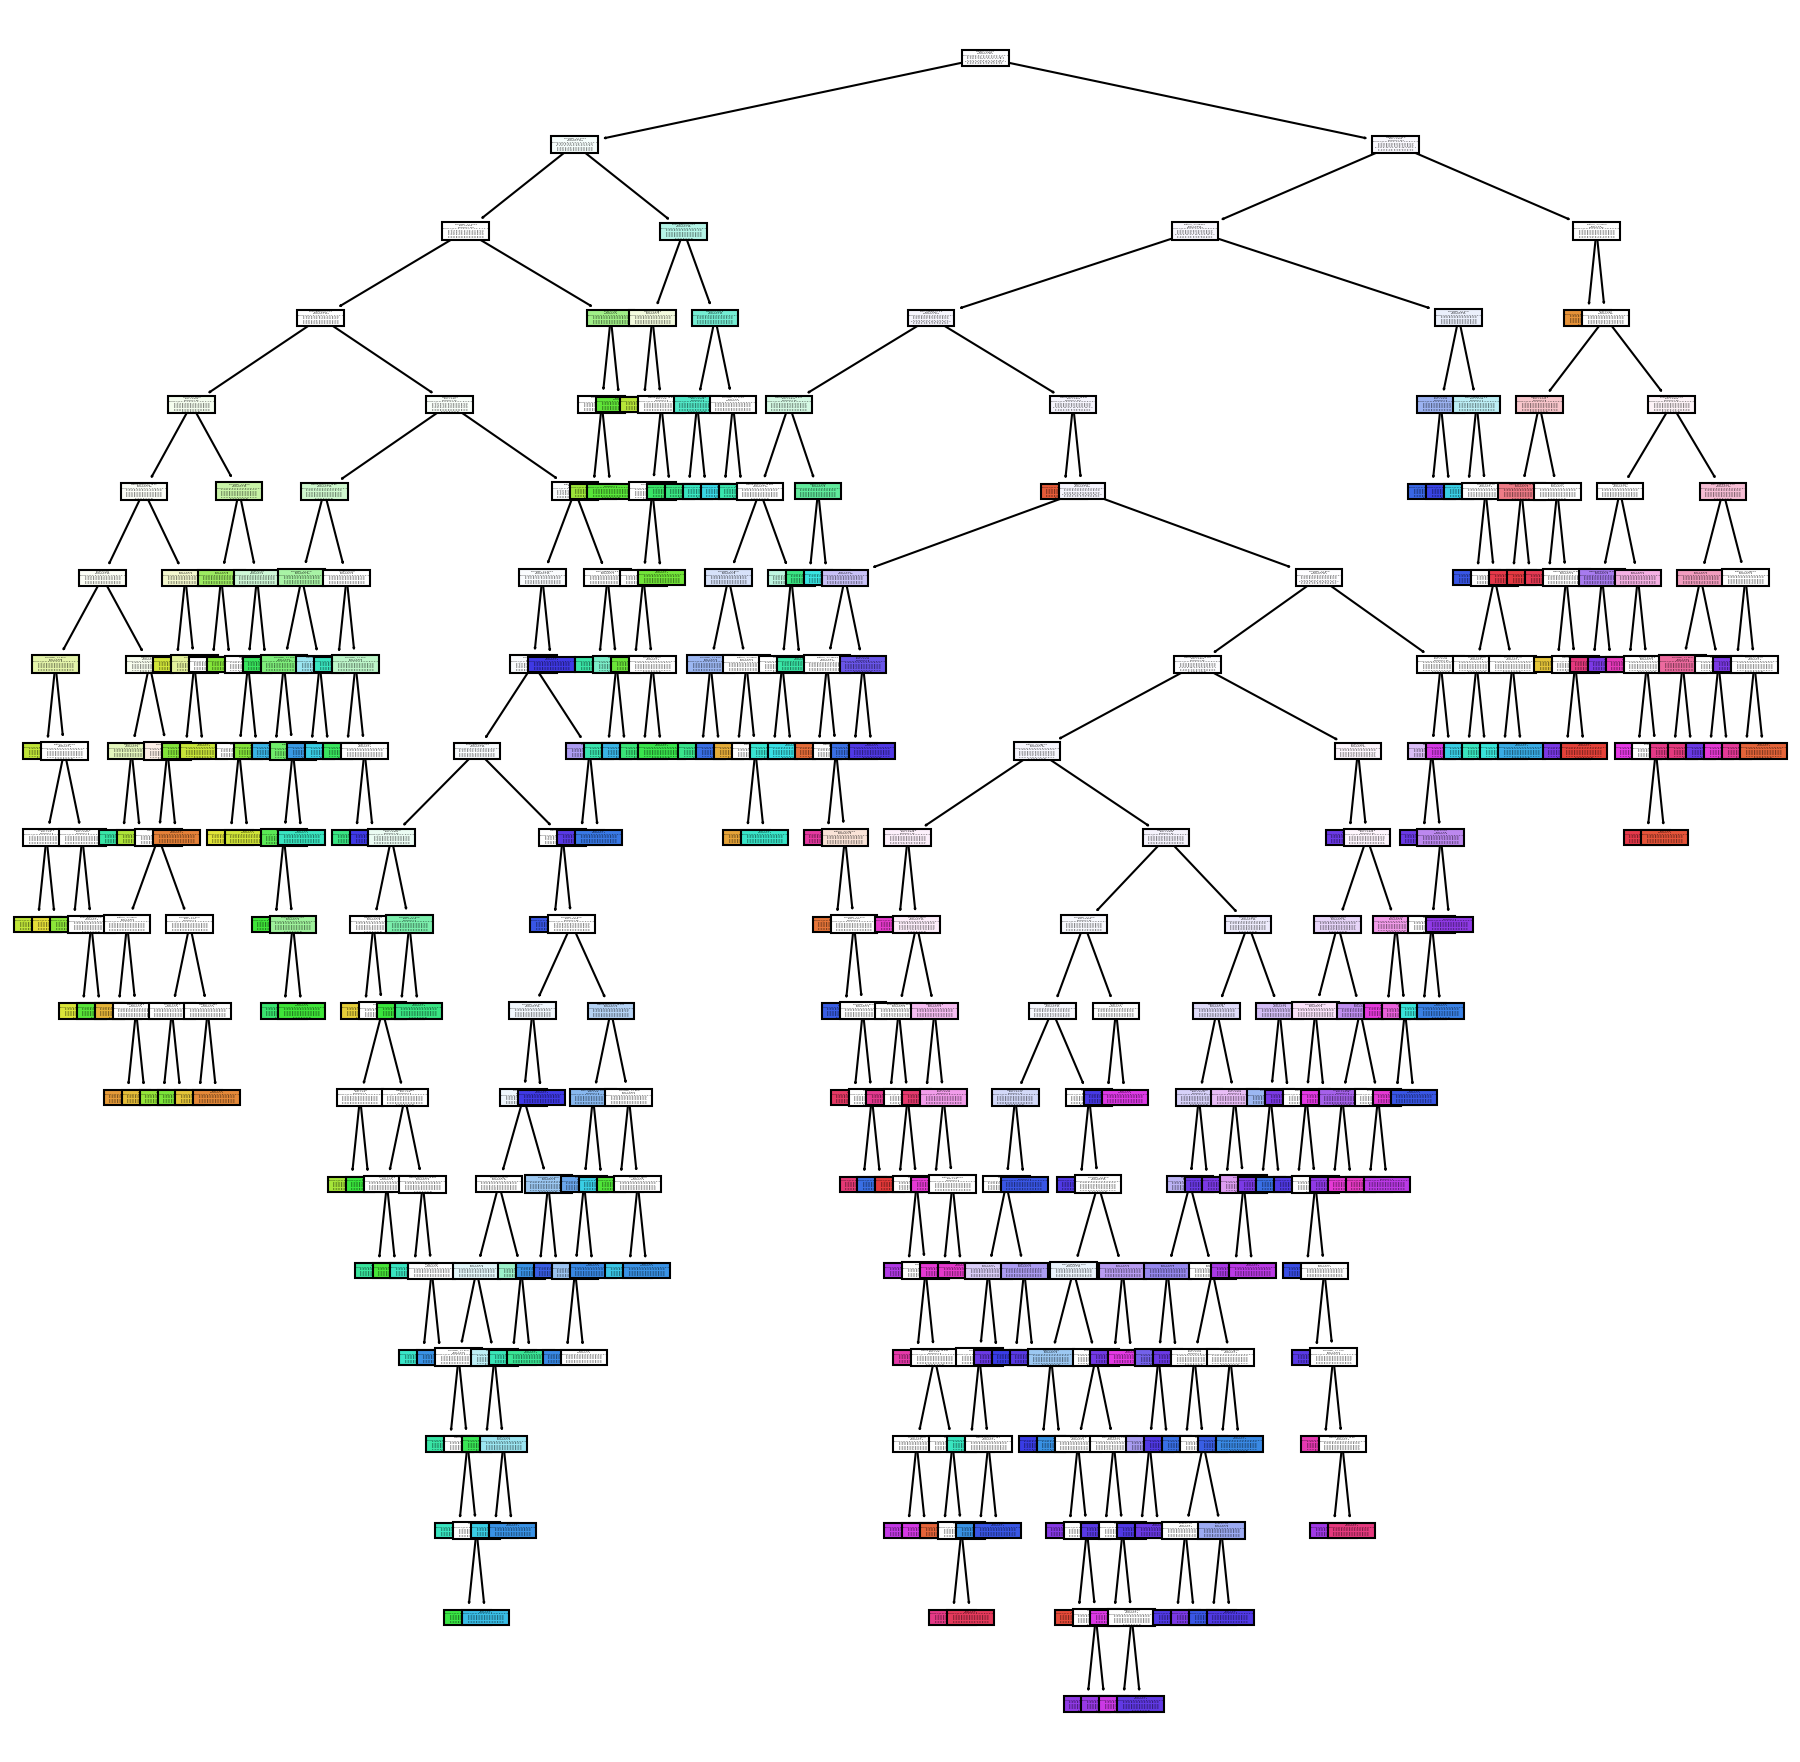

In [97]:
plt.figure(figsize=(15,15), dpi=150)
plot_tree(model, feature_names= X.columns, filled= True);

# RandomForestClassifier

In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

In [149]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [163]:
rfc= RandomForestClassifier(n_estimators=10, random_state=2)

In [169]:
from sklearn.metrics import accuracy_score

In [170]:
Y_train

205    15999
295    13499
463    10548
247      920
170    16999
       ...  
456     9387
360    10699
439    12990
174     5999
122     6199
Name: Price, Length: 324, dtype: Int64

In [171]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=10, random_state=2)

# GradientBoostingRegressor

In [175]:
from sklearn.ensemble import GradientBoostingRegressor

In [176]:
gbr= GradientBoostingRegressor()

In [177]:
gbr.fit(X_train, Y_train)

GradientBoostingRegressor()

In [203]:
gbr.score(X_train, Y_train)

0.981923954676432

In [202]:
gbr.score(X_test, Y_test)

0.9033583617764674

In [204]:
final_data= GradientBoostingRegressor(n_estimators=250, max_depth=2)

In [205]:
final_data.fit(X_train,Y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=250)

# DecisionTreeRegressor

In [180]:
from sklearn.tree import DecisionTreeRegressor

In [181]:
dtr= DecisionTreeRegressor()

In [182]:
dtr.fit(X_train, Y_train)

DecisionTreeRegressor()

In [183]:
dtr.score(X_train, Y_train)

0.9999703848054164

In [184]:
dtr.score(X_test,Y_test)

0.8130743597840387

# RandomForestRegressor

In [192]:
from sklearn.ensemble import RandomForestRegressor

In [193]:
rfr= RandomForestRegressor()

In [194]:
rfr.fit(X_train, Y_train)

RandomForestRegressor()

In [195]:
rfr.score(X_train, Y_train)

0.9773214711071411

In [196]:
rfr.score(X_test, Y_test)

0.8489955770210453

# Model Evaluation

In [197]:
Y_predict= rfr.predict(X_test)

In [198]:
Y_predict

array([19554.        , 25143.96      ,  8912.12      , 15331.26      ,
       17003.01      , 74339.        ,  6930.72      , 27166.81      ,
       25965.2       , 10107.70333333, 10376.9       , 23186.19      ,
       22407.42      ,  9745.        ,  8569.79      , 28698.7       ,
       14248.01      , 28054.45      , 17447.77      , 22639.76      ,
       28890.17      , 19673.17      , 19268.15      , 18947.11      ,
        8547.91      ,  6732.41      , 18843.56      ,  6833.82      ,
       28889.34      , 11992.64583333,  8325.21      , 24802.53      ,
       17028.99      ,  8959.38      , 23479.95      ,  8538.82      ,
       24009.95      ,  9675.6       , 18696.13      , 15158.19      ,
       15332.78      ,  9964.53      , 16262.26      , 52796.        ,
       13535.01      ,  8352.62      ,  6375.48      , 37496.54      ,
       14579.        ,  9997.46      , 10910.05      , 25773.11      ,
        6790.105     , 13628.54      , 31492.83      ,  8734.47166667,
      

In [199]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [200]:
MAE= mean_absolute_error(Y_test,Y_predict)
MSE= mean_squared_error(Y_test,Y_predict)
RMSE= mean_squared_error(Y_test,Y_predict,squared=False)

In [201]:
print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RMSE}")

Mean Absolute Error: 2001.380591946456
Mean Squared Error: 18935602.519423634
Root Mean Squared Error: 4351.505776099078


# Model Loading and Testing

In [206]:
from joblib import dump, load

In [208]:
dump(final_data, 'final_model_price.joblib')

['final_model_price.joblib']

In [209]:
loaded_model= load('final_model_price.joblib')

In [210]:
loaded_model

GradientBoostingRegressor(max_depth=2, n_estimators=250)